In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

In [2]:
df = pd.read_excel('http://taanila.fi/KidCreative.xlsx')
df.head()

,Obs No.,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


In [4]:
df['Income2']=(df['Income']-df['Income'].mean())/df['Income'].std()
df.drop(['Obs No.'], axis=1).head()

,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag,Income2
0,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0,-0.465244
1,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0,1.676463
2,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0,0.458630
3,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0,1.466491
4,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1,0.332647


C:\Users\jantt\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\jantt\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\jantt\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\jantt\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


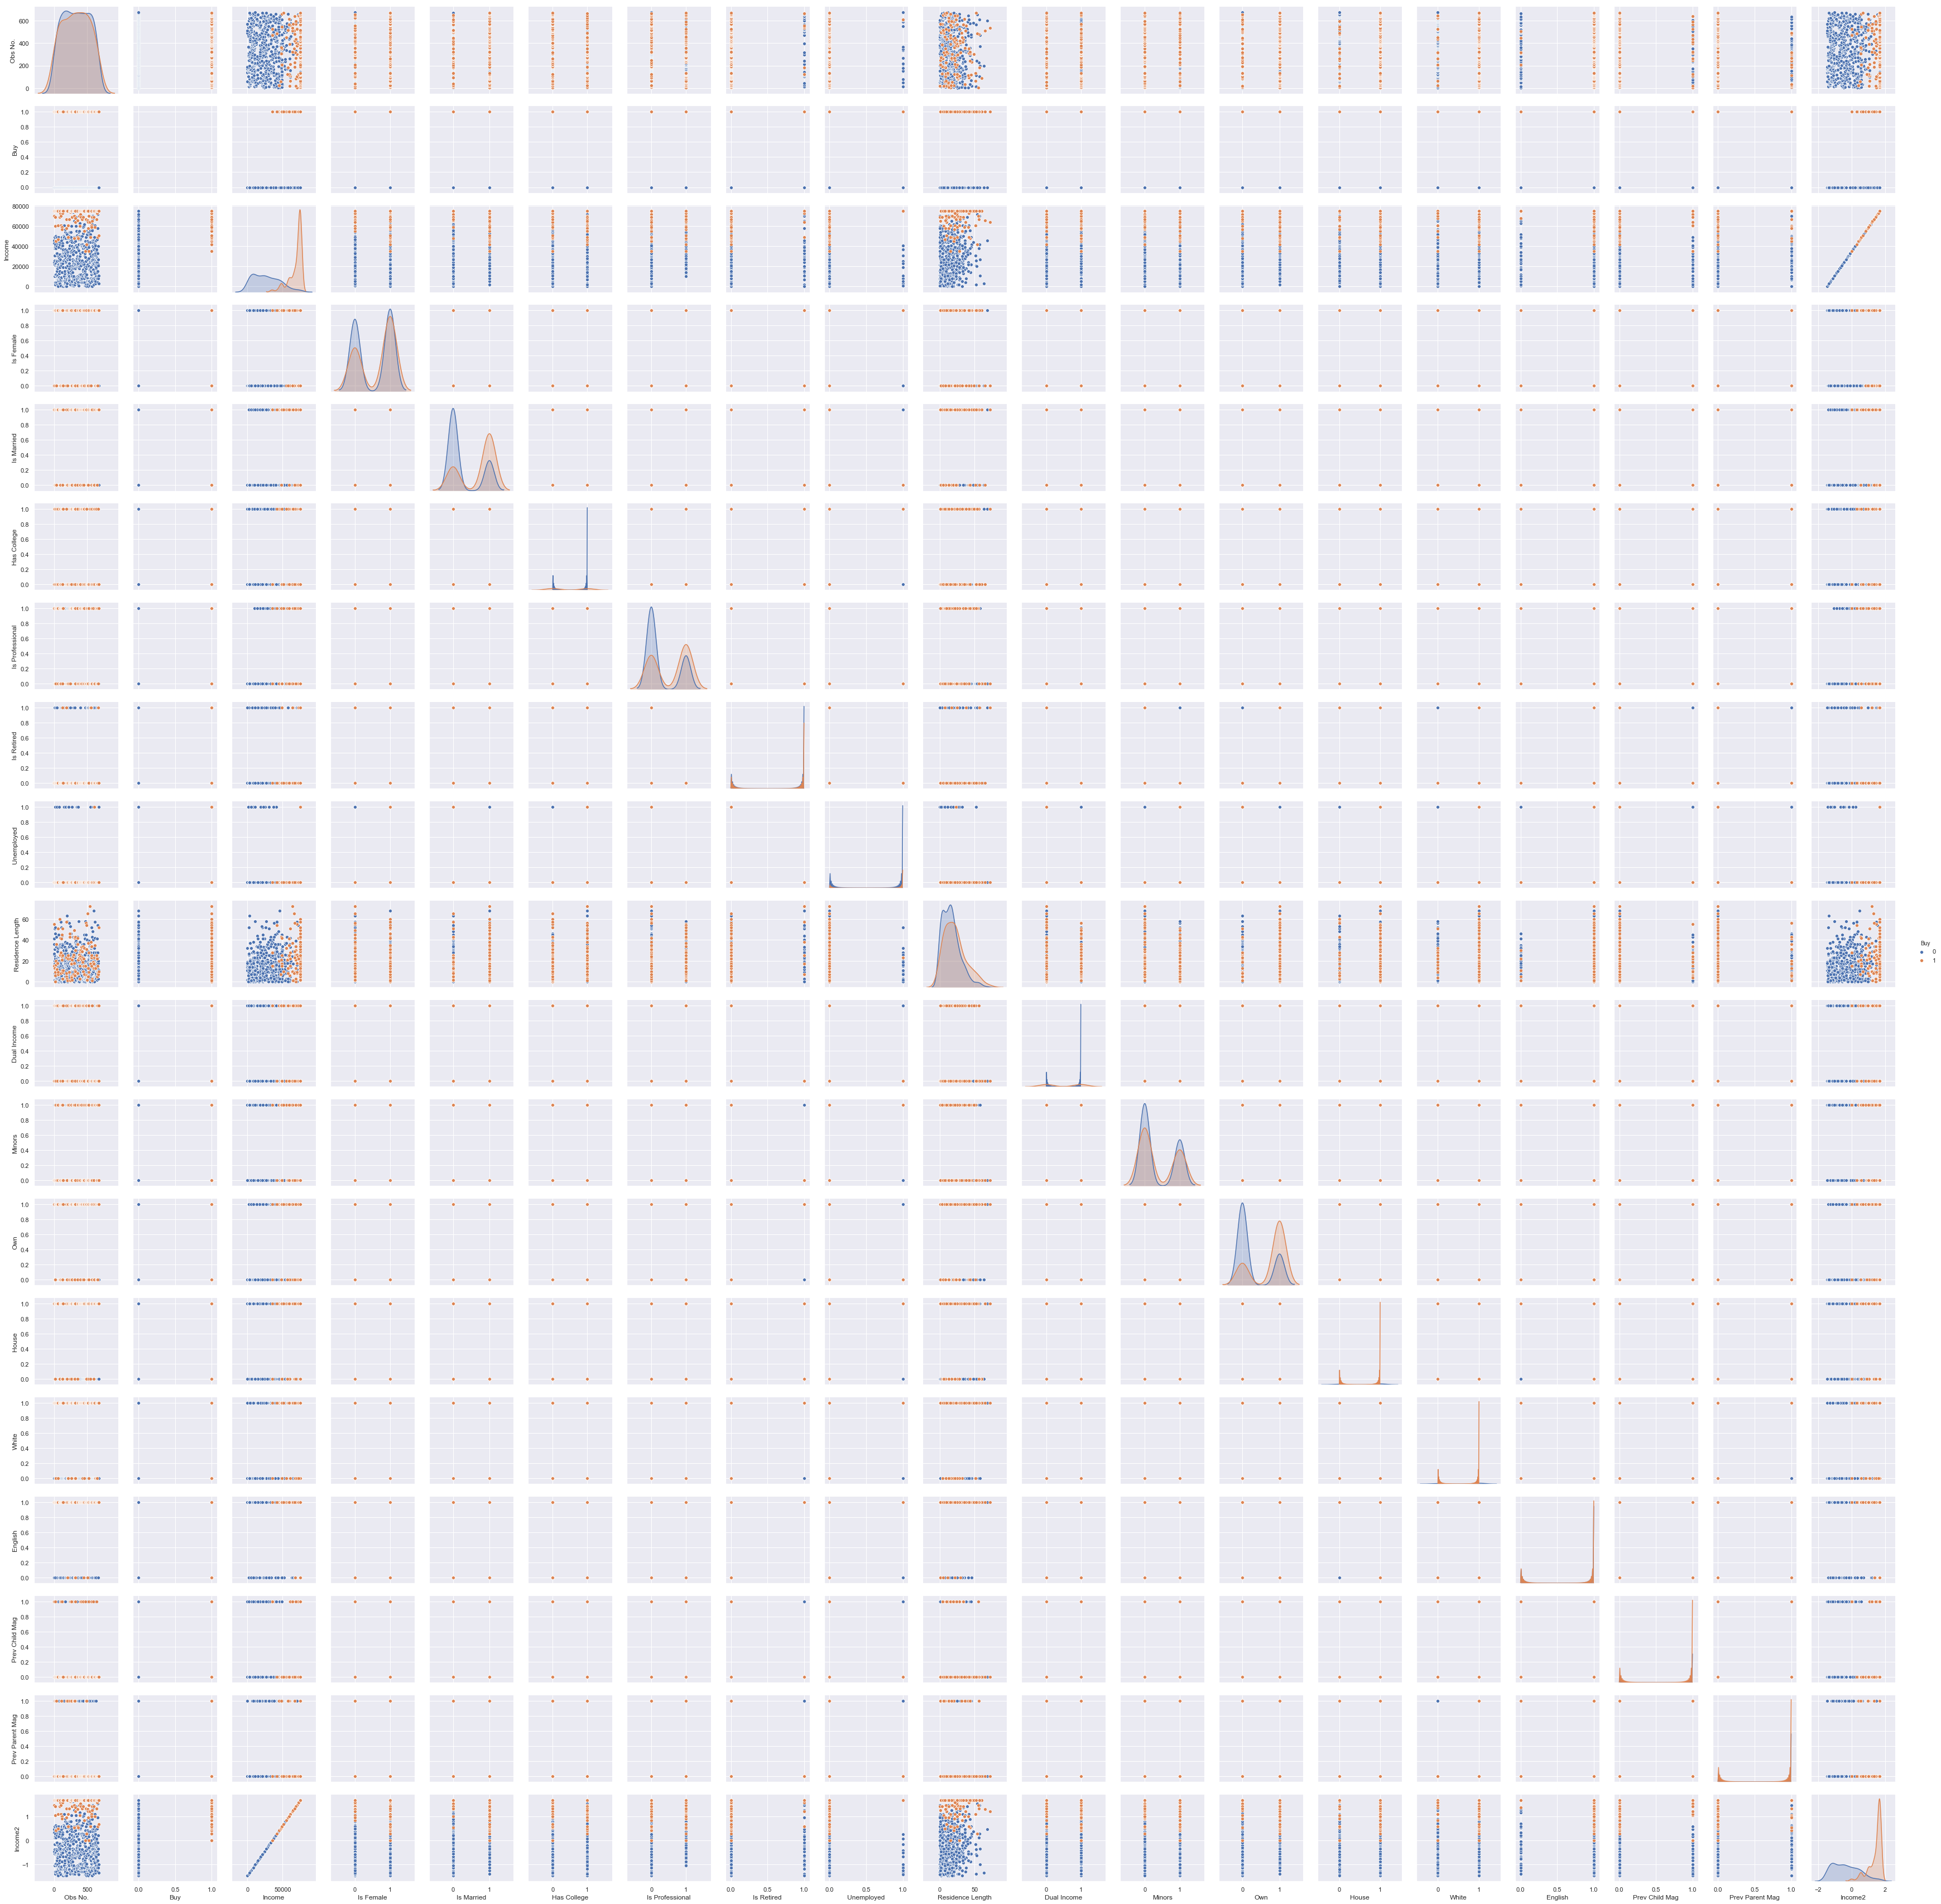

In [5]:
sns.pairplot(df, hue='Buy')

In [6]:
X = df.drop('Buy', axis=1)

y = df['Buy']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=5)

In [8]:
from sklearn.linear_model import LogisticRegression

malli = LogisticRegression()
malli.fit(X_train, y_train)

y_train_malli = malli.predict(X_train)
y_test_malli = malli.predict(X_test)

C:\Users\jantt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_malli)

0.9365079365079365

In [10]:
accuracy_score(y_test, y_test_malli)

0.9349112426035503

In [11]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_malli))

[[393  16]
 [ 16  79]]
